# Water Quality at Sydney Beaches

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# Let's load the data

water_quality = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/water_quality.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/weather.csv')
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123530 entries, 0 to 123529
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 123530 non-null  object 
 1   council                123530 non-null  object 
 2   swim_site              123530 non-null  object 
 3   date                   123530 non-null  object 
 4   time                   112338 non-null  object 
 5   enterococci_cfu_100ml  123223 non-null  float64
 6   water_temperature_c    48491 non-null   float64
 7   conductivity_ms_cm     44994 non-null   float64
 8   latitude               123530 non-null  float64
 9   longitude              123530 non-null  float64
dtypes: float64(5), object(5)
memory usage: 9.4+ MB


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12538 non-null  object 
 1   max_temp_C        12538 non-null  float64
 2   min_temp_C        12538 non-null  float64
 3   precipitation_mm  12538 non-null  float64
 4   latitude          12538 non-null  float64
 5   longitude         12538 non-null  float64
dtypes: float64(5), object(1)
memory usage: 587.8+ KB


As you can see, neither the DataFrames's 'dates' nor the 'time' column are expressed in the right format. Let's fix this:

In [4]:
# Let's create a function for 'dtype' transformation in 'water_quality' DataFrame:

def set_dtypes(dataf):
    """
    This function transform date to 'pd.datetime', time to 'pd.timedelta' then combine,
    and finally set the result as an index
    """
    return (dataf
        .assign(date = lambda d: pd.to_datetime(d['date'], format='%Y-%m-%d'))
        .assign(time = lambda d: pd.to_timedelta(d['time']))
        .assign(datetime = lambda d: pd.to_datetime(d['date'] + d['time']))
        .set_index('datetime'))

In [5]:
water_quality = water_quality.pipe(set_dtypes)
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123530 entries, 2025-04-28 11:00:00 to NaT
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   region                 123530 non-null  object         
 1   council                123530 non-null  object         
 2   swim_site              123530 non-null  object         
 3   date                   123530 non-null  datetime64[ns] 
 4   time                   112338 non-null  timedelta64[ns]
 5   enterococci_cfu_100ml  123223 non-null  float64        
 6   water_temperature_c    48491 non-null   float64        
 7   conductivity_ms_cm     44994 non-null   float64        
 8   latitude               123530 non-null  float64        
 9   longitude              123530 non-null  float64        
dtypes: datetime64[ns](1), float64(5), object(3), timedelta64[ns](1)
memory usage: 10.4+ MB


In [6]:
# Let's transform date to datetime object in 'weather' DataFrame:

weather['date'] = pd.to_datetime(weather['date'], format='%Y-%m-%d')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12538 entries, 0 to 12537
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              12538 non-null  datetime64[ns]
 1   max_temp_C        12538 non-null  float64       
 2   min_temp_C        12538 non-null  float64       
 3   precipitation_mm  12538 non-null  float64       
 4   latitude          12538 non-null  float64       
 5   longitude         12538 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 587.8 KB


In [7]:
water_quality.sort_index().head()

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude,longitude
datetime,,,,,,,,,,
1994-08-23 07:00:00,Northern Sydney,Northern Beaches Council,Palm Beach,1994-08-23,0 days 07:00:00,1.0,NaN,NaN,-33.598779,151.325824
1994-08-27 06:00:00,Sydney City,Randwick City Council,Little Bay Beach,1994-08-27,0 days 06:00:00,20.0,NaN,NaN,-33.979882,151.251417
1994-08-27 06:10:00,Sydney City,Randwick City Council,Malabar Beach,1994-08-27,0 days 06:10:00,9.0,NaN,NaN,-33.964360,151.252247
1994-08-27 06:20:00,Sydney City,Randwick City Council,Maroubra Beach,1994-08-27,0 days 06:20:00,9.0,NaN,NaN,-33.948896,151.257459
1994-08-27 06:30:00,Sydney City,Randwick City Council,Coogee Beach,1994-08-27,0 days 06:30:00,3.0,NaN,NaN,-33.920760,151.258170


In [8]:
weather.head()

,date,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
0,1991-01-01,29.3,22.1,2.4,-33.848858,151.19551
1,1991-01-02,27.5,22.4,0.0,-33.848858,151.19551
2,1991-01-03,28.2,21.1,0.0,-33.848858,151.19551
3,1991-01-04,30.8,23.7,0.0,-33.848858,151.19551
4,1991-01-05,30.4,19.5,12.2,-33.848858,151.19551


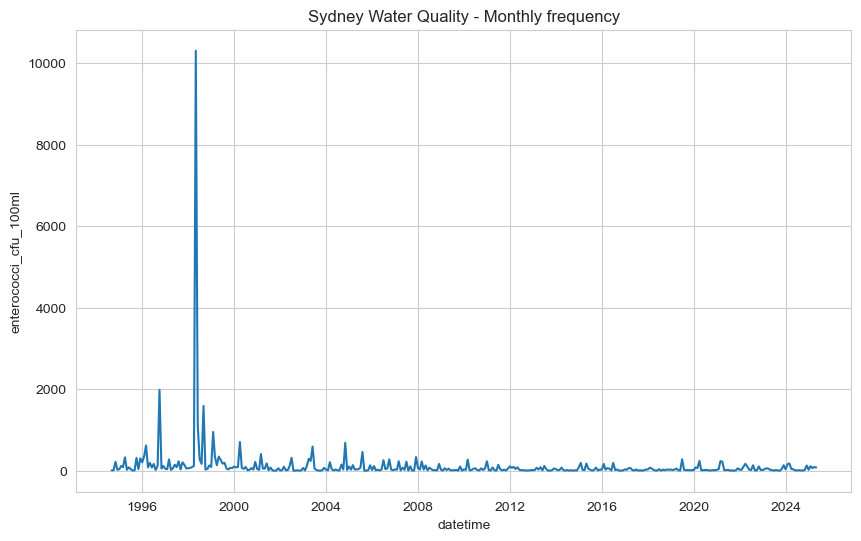

In [9]:
# Has the water quality declined over this period?

quality = water_quality['enterococci_cfu_100ml'].resample('ME').mean()

sns.set_style('whitegrid')
sns.lineplot(quality)
plt.title('Sydney Water Quality - Monthly frequency');

Although the water quality deteriorated in the first period of 1998, on average, the water quality has been improving since then.

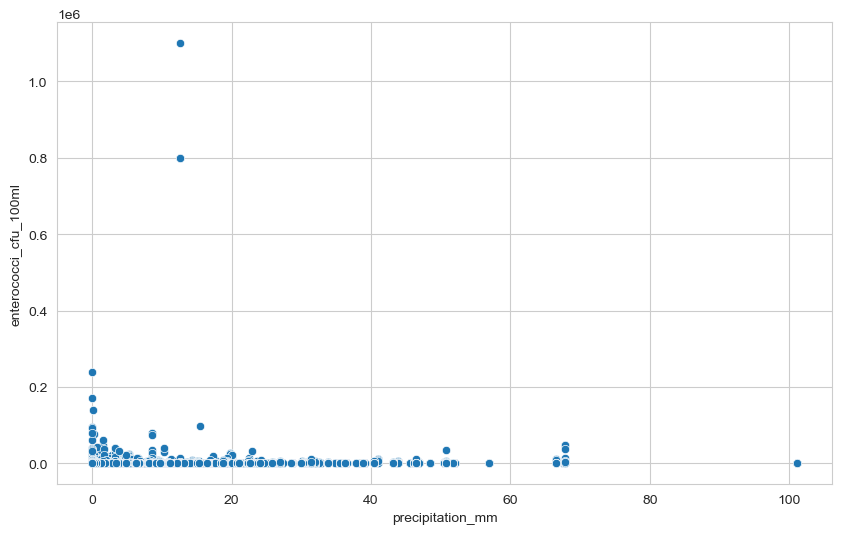

In [10]:
# How does raifall impact E-coli bacteria levels?

df = pd.merge(left=water_quality, right=weather,
              how='inner', on='date')

sns.scatterplot(data=df,
                x='precipitation_mm',
                y='enterococci_cfu_100ml');

In [11]:
(df
    .iloc[:, [5, 12]]
    .corr()
)

,enterococci_cfu_100ml,precipitation_mm
enterococci_cfu_100ml,1.000000,0.025238
precipitation_mm,0.025238,1.000000


In [12]:
# Are some swimming sites particularly prone to high bacteria levels following rain?

(df
    .iloc[:, [2, 5, 12]]
    .dropna()
    .groupby('swim_site')
    .apply(lambda x: x['precipitation_mm'].corr(x['enterococci_cfu_100ml']),
           include_groups=False)
    .dropna()
    .sort_values(ascending=False)
    .head()
)

swim_site
Yosemite Creek - Minnehaha Falls    0.408554
Windsor Beach                       0.383511
Penrith Beach                       0.316099
Callan Park Seawall                 0.228239
Newport Beach                       0.221870
dtype: float64